In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Enable inline plotting
%matplotlib inline

# Path to the directory containing Patient_XX folders
base_dir = Path("~/canvas-hyperscribe/evaluations/cases/synthetic_unit_cases/med_management").expanduser()

In [4]:
all_reports = []

for patient_dir in sorted(base_dir.glob("Patient_*")):
    # change this based on the eval report you want to analyze, either eval_report or eval_report o3
    csv_path = patient_dir / "eval_report.csv"
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df["Patient"] = patient_dir.name
        all_reports.append(df)

if not all_reports:
    raise RuntimeError("No eval_report.csv files found. Please check that they exist.")

full_df = pd.concat(all_reports, ignore_index=True)
print(f"Loaded {len(full_df)} rows across {len(all_reports)} patients.")
full_df.head()

Loaded 473 rows across 40 patients.


,Criterion #,Criterion,Max Score,Satisfaction (%),Score Awarded,Rationale,Patient
0,1,Reward for accurately documenting the counseli...,20,20.0,4.0,Only mentions food-dependent absorption; omits...,Patient_1
1,2,Reward for capturing the insurance/formulary u...,10,0.0,0.0,"No statement about insurance, formulary, or eq...",Patient_1
2,3,Reward for including the patient’s concern abo...,10,0.0,0.0,Does not document pill-appearance concern or s...,Patient_1
3,4,Reward for documenting the clinician’s instruc...,15,60.0,9.0,Includes guidance to wait for snack with fat i...,Patient_1
4,5,Reward for capturing the patient’s irregular-m...,5,0.0,0.0,Irregular-meal/3 a.m. flight scenario and remi...,Patient_1


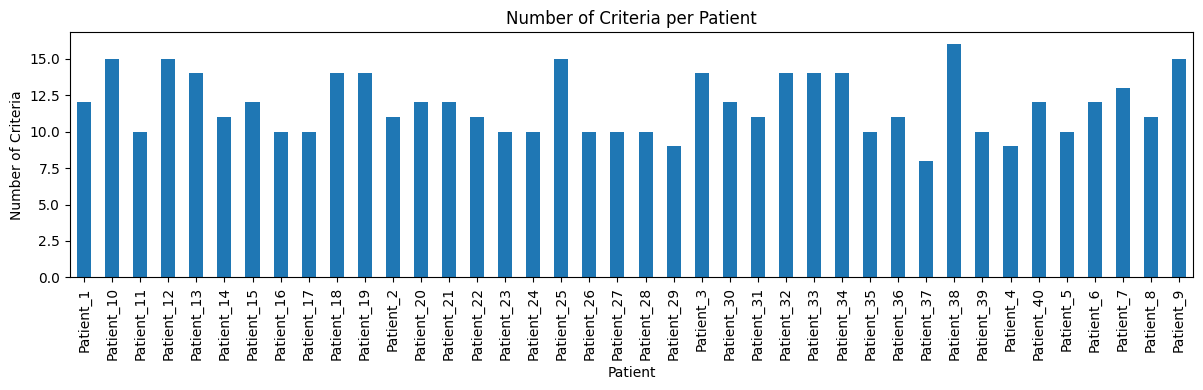

Summary statistics for number of criteria per patient:


count    40.000000
mean     11.825000
std       2.049234
min       8.000000
25%      10.000000
50%      11.500000
75%      14.000000
max      16.000000
dtype: float64

In [5]:
criteria_counts = full_df.groupby("Patient").size()

criteria_counts.plot(kind="bar", figsize=(12, 4), title="Number of Criteria per Patient")
plt.xlabel("Patient")
plt.ylabel("Number of Criteria")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Summary statistics for number of criteria per patient:")
criteria_counts.describe()

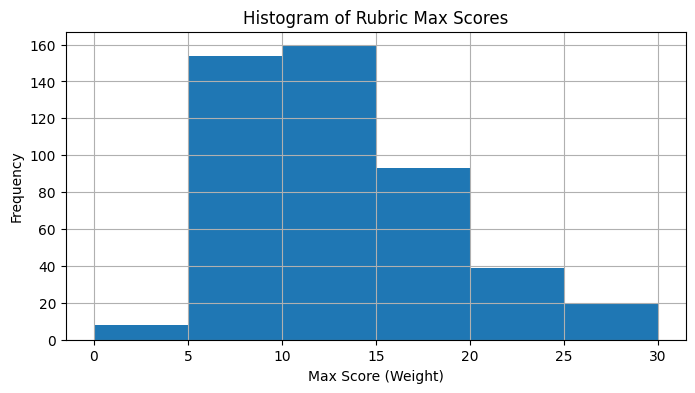

count    473.000000
mean      11.473573
std        5.299888
min        4.000000
25%        8.000000
50%       10.000000
75%       15.000000
max       30.000000
Name: Max Score, dtype: float64

In [6]:
plt.figure(figsize=(8, 4))
full_df["Max Score"].hist(bins=range(0, int(full_df["Max Score"].max()) + 5, 5))
plt.title("Histogram of Rubric Max Scores")
plt.xlabel("Max Score (Weight)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

full_df["Max Score"].describe()

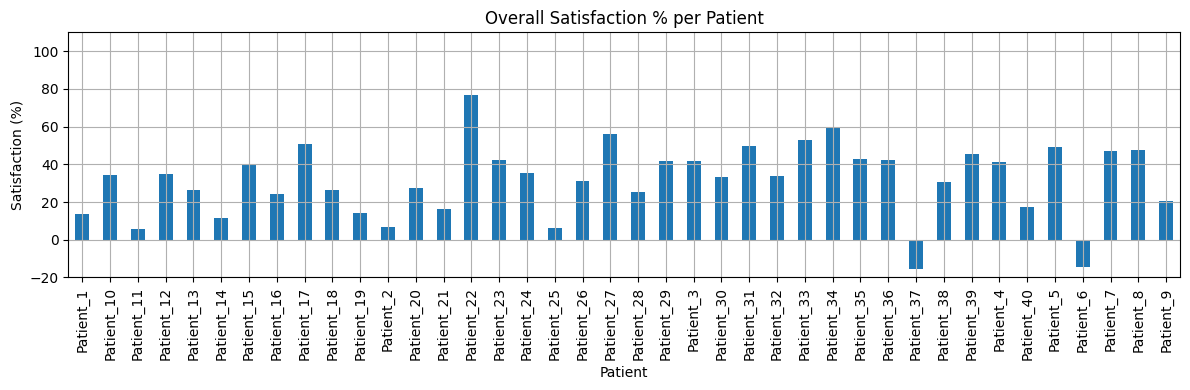

count    40.000000
mean     31.781635
std      19.166841
min     -15.384615
25%      19.943798
50%      33.958596
75%      43.537267
max      76.695652
Name: Satisfaction %, dtype: float64

In [7]:
# Compute total awarded score and total max score per patient
case_scores = (
    full_df.groupby("Patient")
    .agg({"Score Awarded": "sum", "Max Score": "sum"})
    .rename(columns={"Score Awarded": "Total Score", "Max Score": "Total Max Score"})
)

# Compute satisfaction %
case_scores["Satisfaction %"] = 100 * case_scores["Total Score"] / case_scores["Total Max Score"]

# Plot
case_scores["Satisfaction %"].plot(
    kind="bar", figsize=(12, 4), title="Overall Satisfaction % per Patient", ylim=(-20, 110)
)
plt.ylabel("Satisfaction (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary statistics
case_scores["Satisfaction %"].describe()

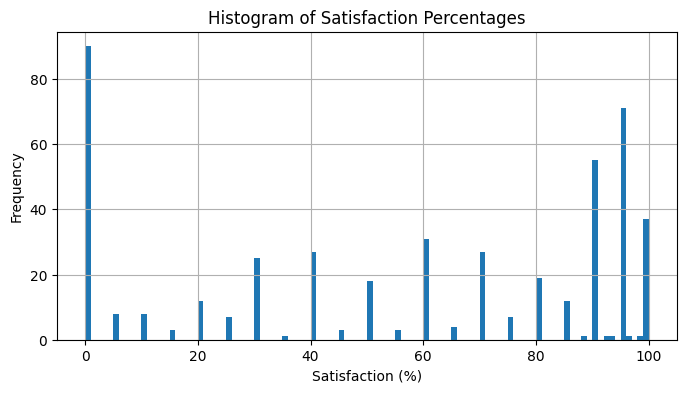

count    473.000000
mean      56.198732
std       37.180199
min        0.000000
25%       20.000000
50%       65.000000
75%       90.000000
max      100.000000
Name: Satisfaction (%), dtype: float64

In [8]:
plt.figure(figsize=(8, 4))
full_df["Satisfaction (%)"].hist(bins=100)
plt.title("Histogram of Satisfaction Percentages")
plt.xlabel("Satisfaction (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

full_df["Satisfaction (%)"].describe()

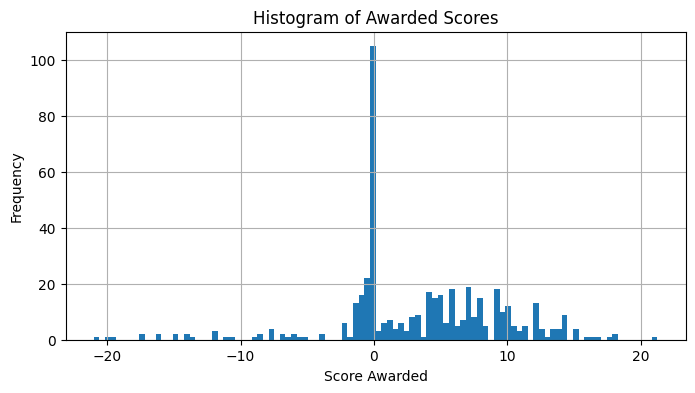

Mean score awarded: 3.44


count    473.000000
mean       3.441966
std        6.313444
min      -21.000000
25%        0.000000
50%        3.200000
75%        7.800000
max       21.250000
Name: Score Awarded, dtype: float64

In [9]:
plt.figure(figsize=(8, 4))
full_df["Score Awarded"].hist(bins=100)
plt.title("Histogram of Awarded Scores")
plt.xlabel("Score Awarded")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Mean score awarded:", round(full_df["Score Awarded"].mean(), 2))
full_df["Score Awarded"].describe()

In [10]:
output_csv = base_dir / "combined_eval_reports.csv"
full_df.list_to_csv(output_csv, index=False)